# COMP90014 Assignment 1
### Semester 2, 2023
Version 1.0 Last edited 31/07/2023.

In [ ]:
### Fill in your student details here
NAME = "Keziah Tikno"
ID = "1319716"

## Completing the assignment

***Academic integrity***

This assignment should be completed by each student individually. <br>
Make sure you read this entire document, and ask for help if anything is not clear. <br>
Any changes or clarifications to this document will be announced via the LMS. <br>

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism.

***Completing the assignment & submission***

To complete the assignment, finish the coding and short answer tasks in this notebook.<br>
Please do not copy or delete cells in this notebook, as this may interrupt the autograding of hidden tests. <br>
Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file.

***Visible & hidden tests***

In some cases, we have provided test input and test output that you can use to try out your solutions. <br> 
These are visible tests and serve to warn you if you've made a mistake but are **not** exhaustive.

During assessment, there are also hidden tests we run to validate your code. <br>
As you won't see the hidden tests, it's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

***Graded cells***

Cells that must be completed to receive marks are clearly labelled with the following text:

`# -- GRADED CELL (N marks) - complete this cell --`

Only add answers to these cells. 

Some cells are code cells, in which you must complete the code to solve a problem. <br>
Others are markdown cells, in which you must write your answers to short-answer questions. 

<br>

***Completing code cells***

You will see the following text in graded code cells:

``` python
raise NotImplementedError()
```
You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.<br>
If you want to import a library or use a helper function, the import statements must be inside the function for that question. 

For example, as seen in Q3a:
``` python
def init_scoregrid(seqX, seqY, gap_score):
    '''
    Given two sequences, initialise and return a scoregrid to be used for Needleman-Wunsch alignment.
    '''
    import numpy as np  
    
```

Include code comments in your solutions! <br>
Well commented code can help you to receive partial marks even if the final solution is incorrect. 

<br>

***Editing the notebook***

Only graded cells will be marked.
- Do **NOT** enter solutions outside of graded cells
- Do **NOT** duplicate or remove cells from the notebook
- You may add new cells to test code, but new cells will not be graded.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

<br>

***Marks***

The total marks for the assignment add up to 40. <br>
This assignment will be worth 10% of your overall subject grade.<br>

- Section A: 12 marks
- Section B: 14 marks
- Section C: 14 marks

No marks are allocated to commenting in your code. <br>
We do however, encourage efficient and well commented code.

## Submission

Make sure you have filled in any place that says `# -- GRADED CELL (N marks) - complete this cell --`.

Before you turn this assignment in, make sure everything runs as expected, and the output is cleared. 

First, **restart the kernel**:

- In the menubar, select Kernel -> Restart.

Next, **run all cells**:

- In the menubar, select Cell -> Run All.

Finally, **clear all output**:

- In the menubar, select Options -> Clear All Outputs

Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format. <br>
You must also submit a copy of this notebook in `html` format with the output cleared.

Your submission should include **only two** files with names formatted as: **Assignment_1.ipynb** and **Assignment_1.html**



# Setup and Data

### Load Packages
If you are using jupyter lab online, all packages will be available. If you are running this on your local computer, you may need to install some packages.

In [ ]:
import numpy as np
from Bio.Align import PairwiseAligner
from collections import defaultdict
from collections import Counter


<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>SECTION A: COMPARING SEQUENCES</h1>

</div>

## Brief 

In order to compare organisms via their sequences, we need a way to measure their difference as a distance. 

In this section, we will:

- Calculate sequence distance by implementing a variation on hamming distance. 
- Calculate sequence distance by comparing the kmer makeup of sequences. 

<br>


## TASK 1: Hamming distance (variant)

One method to compare sequences is using hamming distance.

When working with DNA, hamming distance involves comparing each DNA base individually from the two sequences. 

Hamming distance can be a useful approach (due to its linear time complexity) when:

- The two sequences to compare are the same length
- The two sequences are expected to have no relative shifts (due to indels: insertions / deletions, or structural variation).

The version of hamming distance we implement here will have 2 variations on the normal approach. 

Scores:

- Instead of having match=0, mismatch=1 as scoring scheme, we will use a transition matrix to calculate scores. 
- This will be a better measure of distance for working with DNA sequences. 

Allowing non-equal-length sequences:

- Instead of only allowing equal-length sequences, we will allow the sequences to have different length. 
- When one of the sequences is longer than the other, we will clip off the end of the longer sequence so they now have equal length. 



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1a</h3>
    
<b>Challange:</b> Write a function that calculates a variant of the hamming distance between two sequences. 
    
- [ ] Input: Two sequences (SeqA, SeqB)
- [ ] Ouput: Distance of the sequences as an integer
- [ ] Return zero if either of the input sequences have length zero. 

If the two input sequences have different lengths, remove bases from the end of the longer sequence until the lengths are identical. 

Instead of just counting mismatches, use the following transition matrix when comparing bases: 

<div style="display: block; padding-top: 10px; height: 150px;">
<table align="left">
  <tr bgcolor="white">
    <td></td>
    <td>A</td>
    <td>T</td>
    <td>G</td>
    <td>C</td>
  </tr>
  <tr bgcolor="white">
    <td>A</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
    <td>2</td>
  </tr>
  <tr bgcolor="white">
    <td>T</td>
    <td>1</td>
    <td>0</td>
    <td>2</td>
    <td>2</td>
  </tr>
  <tr bgcolor="white">
    <td>G</td>
    <td>2</td>
    <td>2</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr bgcolor="white">
    <td>C</td>
    <td>2</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>
</div>
  

    

    
</div>

In [ ]:
# -- GRADED CELL (4 marks) - complete this cell --

def hamming_distance_variant(seqA, seqB):
    '''
    Write a function that calculates a variant of the hamming distance between two sequences. 
    If either input sequence has zero length, return zero.
    If one sequence is longer than the other, clip bases from the longer sequence until the lengths are identical. 
    Use the transition matrix above to calculate scores. 
    '''
    distance = None
    
    # YOUR CODE HERE
    dict_score = {('A','A'): 0, ('A','T'): 1, ('A','G'): 2, ('A','C'): 2, ('T','T'): 0,
                ('G','T'): 2, ('C','T'): 2, ('G','G'): 0, ('C','G'): 1, ('C','C'): 0}

    distance = 0
    for a,b in zip(seqA, seqB):
        seq_get = [a,b]
        seq_get.sort()
        seq_get = tuple(seq_get)
        distance += dict_score[seq_get]

    return distance

In [ ]:
# extra code cell for development if needed
        

In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: one mismatch
dist = hamming_distance_variant("AGAATATAACACACAA", "AGAATTTAACACACAA")
print(f"test1: expected=1, actual={dist}")

# test2: multiple mismatches
dist = hamming_distance_variant("AGAATATAACACACAA", "CGACTTTTACACATGG")
print(f"test2: expected=12, actual={dist}")

# test3: length clipping
dist = hamming_distance_variant("AGAATATAACACACAA", "AGAATTTTACACACAAGTACCAC")
print(f"test3: expected=2, actual={dist}")

# test4: zero-length sequence
dist = hamming_distance_variant("AGAATATAACACACAA", "")
print(f"test4: expected=0, actual={dist}")


## TASK 2: K-mer distance

Methods which compare two sequences without considering shifts (indels & structural variation) perform poorly for genomic data.<br> 
This is because indels & structural changes are a common form of variation.  

An alternate method to hamming distance is calculating the kmer distance between two sequences. 

In this approach, sequences are broken up into subsequences of length ***k*** (hence - kmers), then a comparison is done on the kmer makeup of the sequences, rather than the full-length sequences themselves. 

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2a</h3>
    
<b>Challange:</b> Write a function that generates an index of kmers (for k = any number) and their counts for a DNA sequence. 
Use the inbuilt python "dict" type as your index.
    
For each location in the sequence, you will need to extract a kmer of size k, then update your dictionary by incrementing the count for that kmer. 
    
Ensure you check the value of k is valid for the sequences. 
    
- [ ] Input: A sequence string; and a integer k
- [ ] Ouput: A dictionary containing kmers as keys, and the number of times they appear in the sequence as values. 
- [ ] Return an empty dictionary if inputs do not yield any kmers
    
</div>

In [ ]:
# -- GRADED CELL (3 marks) - complete this cell --

def generate_kmer_index(seq, k):
    '''
    Write a function that generates and returns an index of kmers (for k = any number), 
    and their counts for an input DNA sequence. Use the inbuilt python "dict" type as your index. 
    '''
    
    kmer_dict = None
    
    # YOUR CODE HERE
    kmer_dict = {}

    if k > 0:
        for i in range(0, len(seq)-k+1):
            
            cutting_seq = seq[i:k+i]
            
            if cutting_seq in kmer_dict.keys():
                kmer_dict[cutting_seq] += 1
            else:
                kmer_dict[cutting_seq] = 1
    
    return kmer_dict

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: basic test 
print("test1: basic test ---")
print('EXPECTED')
print("""\
AGA: 2
GAC: 2
ACA: 1
CAG: 1
""")

index = generate_kmer_index("AGACAGAC", 3)
print('ACTUAL')
for kmer, locs in index.items():
    print(f"{kmer}: {locs}")
    
# test2: input yields no valid kmers
index = generate_kmer_index("AGACAGAC", 9)
print("\ntest2: input yields no valid kmers ---")
print(f'EXPECTED: 0  ACTUAL: {len(index)}')

# test3: input yields no valid kmers
index = generate_kmer_index("AGACAGAC", -1)
print("\ntest3: input yields no valid kmers ---")
print(f'EXPECTED: 0  ACTUAL: {len(index)}')


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2b</h3>
    
Now that we can index a sequence using kmers, we can compare sequences via their kmer composition.
    
<b>Challange:</b> Write a function which indexes two sequences using kmers, then returns their distance as an integer.

First, index the two sequences using your previous generate_kmer_index() function.<br> 
After creating the indexes, use these to calculate kmer distance.<br>
    
- [ ] Input: Two sequences (seqA, seqB); and a integer k
- [ ] Ouput: An integer representing the kmer distance
- [ ] Return zero if either sequence yields no kmers
    
Distance is defined here as the sum of differences in kmer occurances between the indexes. <br>
This includes where a kmer is unique to <strong>either</strong> sequence. For example: 
    
- If the kmer "ATA" is present 4 times in seqA, and only 3 times in seqB, this would increase distance by 1. 
- If the kmer "ATA" is present 4 times in seqA, but zero times in seqB, this would increase distance by 4. 
    
</div>

In [ ]:
 # -- GRADED CELL (5 marks) - complete this cell --

def calc_kmer_distance(seqA, seqB, k):
    '''
    Write a function which indexes two sequences using kmers, then returns their distance as an integer.
    '''
    
    distance = 0
    seqA_index = generate_kmer_index(seqA, k) 
    seqB_index = generate_kmer_index(seqB, k)
    
    # YOUR CODE HERE
    for kmer in seqA_index:
        if kmer in seqB_index:
            difference = abs(seqA_index.get(kmer) - seqB_index.get(kmer))
            distance += difference
        else:
            distance += seqA_index.get(kmer)
    
    for kmer in seqB_index:
        if not kmer in seqA_index:
            distance += seqB_index.get(kmer)
        else:
            continue
    
    return distance

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: zero distance 
dist = calc_kmer_distance("ATA", "ATA", 3)
print(f'test1: Expected=0, Actual={dist}')

# test2: unique kmers in seqA
dist = calc_kmer_distance("ATAGCAG", "ATA", 3)
print(f'test2: Expected=4, Actual={dist}')

# test3: unique kmers and occurance differences
dist = calc_kmer_distance("GGGGACTGGACGCAG", "GGGGGGGGAGTGGACGCTG", 4)
print(f'test3: Expected=16, Actual={dist}')

# test4: no valid kmers
dist = calc_kmer_distance("ATAGCACTG", "ATAGCACTG", 10)
print(f'test4: Expected=0, Actual={dist}')


<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    
<h1>SECTION B: PAIRWISE ALIGNMENT</h1>
</div>


## Brief

Another way to compare the similarity of two sequences is through alignment.<br>
The alignment score of two sequences will be high when they are similar, and low when they are distinct.

Alignment is a much better measure of similarity between two sequences than hamming distance or kmer distance. <br>
This is because matches, mismatches, and shifts within the sequences (indels, structural variation) are all considered. <br>

The trade-off is a higher complexity: ***O(n^2)*** for alignment methods, vs ***O(n)*** for hamming & kmer based methods. 



In this section we will implement the Needleman-Wunsch global alignment algorithm to compare sequences & calculate alignment scores. 

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
    
<h3>Question 3a</h3> 
    
<b>Challange:</b> Write a function that initialises and returns a scoregrid for two sequences.
    
The scoregrid should be set up for Needleman-Wunsch global alignment.     
    
- [ ] Input: Two sequences as strings; a gap score as an integer.
- [ ] Output: scoregrid as a numpy array


<b>Hints:</b>
    
- Consider whether gap scores for the first row and column need to be filled in, and if so, how to do this. 
- Consider the dimensions of the scoregrid relative to the input sequences

</div>



In [ ]:
# -- GRADED CELL (5 marks) - complete this cell --

def init_scoregrid(seqX, seqY, gap_score):
    '''
    Given two sequences, initialise and return a scoregrid to be used for Needleman-Wunsch alignment.
    '''
    import numpy as np
    
    scoregrid = None
    
    # YOUR CODE HERE
    
    scoregrid = np.zeros(shape=(len(seqY)+1, len(seqX)+1))

    for i in range(1, len(seqX)+1):
        scoregrid[0,i] = gap_score * i

    for i in range(1, len(seqY)+1):
        scoregrid[i,0] = gap_score * i

    return scoregrid

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code
gap_score = -4

# test1: check that scoregrid is a numpy array
import numpy as np
scoregrid = init_scoregrid('cello', 'hello', gap_score)
correct_type = isinstance(scoregrid, np.ndarray)
print(f'test1: scoregrid is a numpy array? {correct_type}')

# test2: prints the scoregrid for "ATA" vs "ATA"
# # please decide if this looks right!
print('\ntest2: "ATA" vs "ATA"')
print(init_scoregrid('ATA', 'ATA', -4))

# test3: prints the scoregrid for "SATURDAY" vs "SUNDAY"
# please decide if this looks right!
print('\ntest3: "SATURDAY" vs "SUNDAY"')
print(init_scoregrid('SATURDAY', 'SUNDAY', -4))


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<h3>Question 3b</h3>
    
Now that we have initialised a scoregrid, we need to calculate the scores for each cell.

<b>Challenge:</b> Write a function that calculates the score for a single cell in the scoregrid, according to the Needleman-Wunsch algorithm.  
    
- [ ] Input: The characters from seqA and seqB for this cell; The scores for the surrounding cells; match, mismatch and gap scores as integers.
- [ ] Output: The score for the cell as an integer
    
</div>

In [ ]:
# -- GRADED CELL (4 marks) - complete this cell --

def calculate_cell(charX, charY, left, diag, above, match=1, mismatch=-2, gap=-4):
    '''
    Write a function that calculates the score for a single cell in the scoregrid, 
    according to the Needleman-Wunsch algorithm. 
    '''
    score = None
    
    # YOUR CODE HERE
    score = 0
    
    if charX == charY:
        cost = match
    else:
        cost = mismatch

    score = max(diag + cost, left + gap, above + gap)
            
    return score

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: matching characters
score = calculate_cell('A', 'A', 0, 0, 0)
print(f'test1: expected=1, actual={score}')

# test2: match characters with variable surrounding cell scores
score = calculate_cell('A', 'A', 2, 1, -2)
print(f'test2: expected=2, actual={score}')

# test3: mismatch characters with variable surrounding cell scores
score = calculate_cell('A', 'C', 2, -2, -2)
print(f'test3: expected=-2, actual={score}')


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<h3>Question 3c</h3>

<b>Challenge:</b> Use the init_scoregrid() and calculate_cell() functions from Q3a and Q3b to perform Needleman-Wunsch global alignment. Return the alignment score. 
    
- [ ] Input: The two sequences to compare; match, mismatch and gap scores as integers.
- [ ] Output: The alignment score as an integer.
- [ ] If one sequence has length zero, return zero
- [ ] Remember to return the correct cell as the alignment score after populating the scoregrid. 
- [ ] You <strong>do not</strong> need to implement backtracking, only populating the scoregrid and returning the alignment score. 
    
</div>

In [ ]:
# -- GRADED CELL (5 marks) - complete this cell --

def needleman_wunsch(seqA, seqB, match=1, mismatch=-2, gap=-4):
    '''
    Write a function which performs Needleman-Wunsch alignment on two sequences.
    Use your previous init_scoregrid() and calculate_cell() functions from Q3a & Q3b. 
    You do not need to implement backtracking, only populating the scoregrid and returning the alignment score. 
    '''
    
    alignment_score = None
    
    # YOUR CODE HERE
    array = init_scoregrid(seqA, seqB, gap)

    for i in range(1, len(array)):
        for j in range(1, len(array[i])):
            array[i][j] = calculate_cell(seqA[j-1], seqB[i-1], array[i][j-1],
                                         array[i-1][j-1],array[i-1][j], match, mismatch,
                                         gap)
    
            alignment_score = array[i][j]
    
    return alignment_score    

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: identical sequences
aln_score = needleman_wunsch('ATA', 'ATA')
print(f'test1: expected=3.0, actual={aln_score}')

# test2: identical sequences with non-nucleotide alphabet
aln_score = needleman_wunsch('KITTEN', 'KITTEN')
print(f'test2: expected=6.0, actual={aln_score}')

# test3: single gap
aln_score = needleman_wunsch('ATAT', 'TAT')
print(f'test3: expected=-1.0, actual={aln_score}')

# test4: gaps and mismatches
aln_score = needleman_wunsch('SATURDAY', 'SUNDAY')
print(f'test4: expected=-5.0, actual={aln_score}')


<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    
<h1>SECTION C: Gene mapping</h1>
</div>


## Brief

In section 1 we indexed sequences using kmers, and in section 2 we performed global alignment by implementing Needleman-Wunsch. <br>
We can now combine these strategies to map gene sequences to their locations in a genome. 

NOTE: In section 3 we will use the Bio.Align package to perform alignment, rather than our implementation from section 2. <br>
This is so that imperfect implementations of Needleman-Wunsch in section 2 don't put you at a disadvantage in section 3. 

Our strategy will be as follows:
1. [ ] Create a ***genome index*** using kmers
2. [ ] For each position in the gene, extract a kmer and look up its locations in the ***genome index*** 
3. [ ] For each location, calculate a ***genome window*** so we can perform global alignment of ***gene sequence*** vs ***genome window***
4. [ ] For each ***genome window***, Perform Needleman-Wunsch alignment of the ***gene sequence*** to the window using the Bio.Align package to get an alignment score
5. [ ] Return the start position of the ***genome window*** with best alignment score as the mapping location. 


<br>

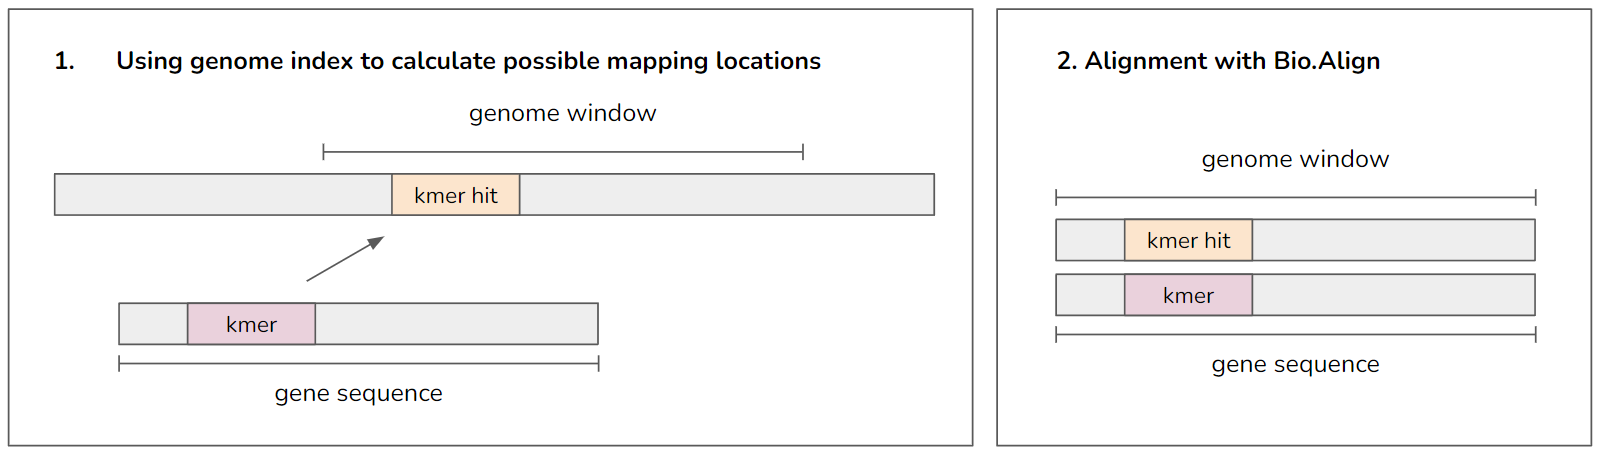

<br>
<br>



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4a</h3>
    
<b>Challenge:</b> Write a function that generates an index of kmers (for k = any number) and their locations for a DNA sequence. Use the python inbuilt "dict" type as your index.  

For each location in the sequence, you will need to extract a kmer of size k, then update your dictionary for that kmer and its new witnessed location. 
    
The location of the first kmer you extract is loc = 0 (same as list indexing).
    
Ensure you check the value of k is valid for the sequences. 
    
- [ ] Input: A sequence string; and a integer k
- [ ] Ouput: A dictionary containing kmers as keys, and the locations they appear in the sequence (list of integers) as values. 
- [ ] Return an empty dictionary if inputs do not yield any kmers
    
</div>

In [ ]:
# -- GRADED CELL (3 marks) - complete this cell --

def generate_genome_index(seq, k):
    '''
    Write a function which creates an genome index using the inbuilt python "dict" type. 
    The index should store kmers and their locations as a list of integers from an input sequence.
    Return the index.
    '''
    
    kmer_dict = None
    
    # YOUR CODE HERE
    kmer_dict = {}
    
    for i in range(0, len(seq)-k+1):
        kmer = seq[i:k+i]

        if kmer != '':
            if kmer not in kmer_dict:
                kmer_dict[kmer] = [i]
            else:
                kmer_dict[kmer] += [i]
        
    return kmer_dict

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: basic test 
print("test1: basic test ---")
print('EXPECTED')
print("""\
AGA: [0, 4]
GAC: [1, 5]
ACA: [2]
CAG: [3]
""")

index = generate_genome_index("AGACAGAC", 3)
print('ACTUAL')
for kmer, locs in index.items():
    print(f"{kmer}: {locs}")


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<h3>Question 4b</h3>
  
<b>Challange:</b> Write a function which calculates the Needleman-Wunsch alignment score of a gene and a genome window. Use the Bio.Align.PairwiseAligner class from Biopython to perform alignment. 

- [ ] Input: A gene sequence; a genome window sequence.
- [ ] Ouput: An alignment score  
    
Note: 
- An PairwiseAligner class has been set up in the calc_alignment_score() function to select Needleman-Wunsch alignment, and to configure penalty scores. 
- PairwiseAligner.align() may return 2+ alignments if there are multiple equally good alignments.
- Documentation can be seen at https://biopython.org/docs/dev/api/Bio.Align.html if needed. 
    
<b>Hint:</b>
    
- It may be useful to print() the alignments produced by PairwiseAligner.align() 
    
        
</div>

In [ ]:
# -- GRADED CELL (3 marks) - complete this cell --

def calc_alignment_score(gene, genome_window):
    """
    Write a function which calculates the alignment score of a gene and a genome window.
    Use the Bio.Align.PairwiseAligner() function from Biopython.
    Note: PairwiseAligner may return 2+ alignments if there are multiple equally good alignments.
    """
    
    from Bio.Align import PairwiseAligner
    aligner = PairwiseAligner()
    aligner.mode = 'global'
    aligner.match_score = 2
    aligner.mismatch_score = -1
    aligner.gap_score = -4

    score = None
    
    # YOUR CODE HERE
    alignment = aligner.align(gene, genome_window)
    score = alignment.score
    
    return score

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: identical sequences
print(f"test1: expected=10.0, actual={calc_alignment_score('ATAGC', 'ATAGC')}")

# test2: difference sequences
print(f"test2: expected=-1.0, actual={calc_alignment_score('GACCTG', 'CGATCG')}")


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

<h3>Question 4c</h3>
  
<b>Challange:</b> Write a function which performs gene mapping to a genome. The function should implement the strategy outlined in the section C <b>Brief</b>.  Use your generate_genome_index() from Q4a to index the genome using kmers of size k, and the calc_alignment_score() function from Q4b to perform alignment of the gene to a genome window. 
    
- [ ] Input: A gene sequence; a genome sequence; an integer k. 
- [ ] Ouput: The best gene mapping location; the alignment score for that location. 
   
        
</div>

In [ ]:
# -- GRADED CELL (4 marks) - complete this cell --

def gene_mapping(gene, genome, k):
    """
    Write a function which finds the best alignment location of a gene in a genome.
    Use your previous generate_genome_index() and calc_alignment_score() functions from Q4a & Q4b.
    Return the best location, and the score for that location. 
    If there a multiple equal best alignment locations, return the first one (lowest location)
    """
    
    best_loc = 0
    best_score = 0
    
    # YOUR CODE HERE
    genome_index = generate_genome_index(genome, k)

    for i in range(0, len(gene)-k+1):
        kmer = gene[i:k+i]
        if kmer in genome_index.keys():
            index = genome_index.get(kmer)
            for i in index:
                genome_window = genome[i:i+len(gene)]
                if best_score < calc_alignment_score(gene, genome_window):
                    best_score = calc_alignment_score(gene, genome_window)
                    best_loc = i
                else:
                    continue
        else:
            continue
    
    return best_loc, best_score

In [ ]:
# extra code cell for development if needed


In [ ]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: basic test 
best_loc, best_score = gene_mapping('ATAGC', 'GACGCATGATACCAGCTAGTCT', 3)
print(f'test1: expected best_loc=8, actual best_loc={best_loc}')
print(f'test1: expected best_score=7.0, actual best_score={best_score}')


### Short Answer Question

### Question 4d

(4 marks, max 100 words)

<div class="alert alert-info">

In question 4 we use global alignment to compare a read to a genomic window. 

While being simple, our strategy has some trade-offs:
    
- The strategy may not produce a correct result if indels or structural variation are present in either the read or the genomic window, as the calculated window may not be the right size. 
- The strategy is inefficient as we know that part of the read is already an exact match to the genomic window, as we first used kmers to find seed locations for alignment.
- The strategy is inefficient as we perform full-length alignment of read vs genomic window, even when the alignment score starts to rapidly drop (while populating the alignment scoregrid).
    
Describe some changes we could make to our strategy to address the points above. 
    
</div>

<span style="color:rgb(17, 122, 121); font-family:Courier"><i><b># -- GRADED CELL (4 marks) - complete this cell --</b></i></span>

YOUR ANSWER HERE




Instead of finding the exact length of gene sequence in the genome, we can use other method such as semi-global alignment or local alignment where there is no penalty for the offset bases. It will address issues with indels in either the read or the genomic window while allowing the sequence to shift without the worry to be penalised.
When we find the seed locations in the dictionary, we can directly map our sequence to the genome on that kmer seed and do the alignment. 
Local alignment is better in the sense that is is finding the best local similarity in a region although it is still filling the whole scoregrid. Maybe we can give a threshold when it drops to stop populating the whole scoregrid. 

<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    
<h1>END OF ASSIGNMENT</h1>
</div>


## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared (see step 3).


Your submission should include **only two** files with names formatted as: **Assignment_1.ipynb** and **Assignment_1.html**